# Ev Fiyat Tahmin Modeli


---------

## İş Problemi

**Senaryo**

Her bir eve ait özelliklerin ve ev fiyatlarının bulunduğu veriseti kullanılarak,
farklı tipteki evlerin fiyatlarına ilişkin bir makine öğrenmesi projesi
gerçekleştirilmek istenmektedir.

## Veri Seti Hikayesi

*Ames, Lowa’daki konut evlerinden oluşan bu veri seti içerisinde 79 açıklayıcı değişken bulunduruyor. Kaggle üzerinde bir yarışması
da bulunan projenin veri seti ve yarışma sayfasına aşağıdaki linkten ulaşabilirsiniz. Veri seti bir kaggle yarışmasına ait
olduğundan dolayı train ve test olmak üzere iki farklı csv dosyası vardır. Test veri setinde ev fiyatları boş bırakılmış olup, bu
değerleri sizin tahmin etmeniz beklenmektedir.
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation*

## To do List:

**GÖREV 1**: Keşifçi Veri Analizi

**GÖREV 2**: Feature Engineering

**GÖREV 3**: Model Kurma


-------

### Görev 1 : Keşifçi Analiz

In [ ]:
# Gerekli kütüphaneleri import edelim;
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

# pandas görüntü ayarlarını yapalım;

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# train ve test veri setini çalışmaya dahil edelim ve birleştirelim;

train = pd.read_csv(r"/content/drive/MyDrive/ML/CaseStudy1/data/train.csv")
test =  pd.read_csv(r"/content/drive/MyDrive/ML/CaseStudy1/data/test.csv")

# test veri setini çalışamanın son kısmına ekliyoruz.
df_ = train.merge(test, how = "outer")
df = df_.copy()

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [ ]:
# Veri setinde genel resmi görmek için bir fonksiyon hazırlayalım ve uygulayalım;

def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2  

In [ ]:
# veri seti içindeki numerik, kategorik ve kardinal değişkenleri ayırt edelim;

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [ ]:
# kategorik değişkenlerin veri içindeki dağılımını gösterelim;

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)


         MSZoning  Ratio
RL           2265 77.595
RM            460 15.759
FV            139  4.762
RH             26  0.891
C (all)        25  0.856
      Street  Ratio
Pave    2907 99.589
Grvl      12  0.411
      Alley  Ratio
Grvl    120  4.111
Pave     78  2.672
     LotShape  Ratio
Reg      1859 63.686
IR1       968 33.162
IR2        76  2.604
IR3        16  0.548
     LandContour  Ratio
Lvl         2622 89.825
HLS          120  4.111
Bnk          117  4.008
Low           60  2.055
        Utilities  Ratio
AllPub       2916 99.897
NoSeWa          1  0.034
         LotConfig  Ratio
Inside        2133 73.073
Corner         511 17.506
CulDSac        176  6.029
FR2             85  2.912
FR3             14  0.480
     LandSlope  Ratio
Gtl       2778 95.170
Mod        125  4.282
Sev         16  0.548
        Condition1  Ratio
Norm          2511 86.023
Feedr          164  5.618
Artery          92  3.152
RRAn            50  1.713
PosN            39  1.336
RRAe            28  0.959
PosA   

In [ ]:
# Veri seti içerisindeki sayısal değişkenlerin dağılımlarını gözlemleyelim;

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)


In [ ]:
# Veri setindeki kategorik değişkenlerin hedef değişken ile arasındaki bağlantıyı gözlemleyelim;

def target_summary_with_cat(df, col ,target):
  print(col)
  print(pd.DataFrame({"Count" : df.groupby(col)[target].count(),
         "TARGET_Mean" : df.groupby(col)[target].mean()}),end= "\n\n")
  print("#"*30)

for col in cat_cols:
  target_summary_with_cat(df,col,"SalePrice")

MSZoning
          Count  TARGET_Mean
MSZoning                    
C (all)      10    74528.000
FV           65   214014.062
RH           16   131558.375
RL         1151   191004.995
RM          218   126316.830

##############################
Street
        Count  TARGET_Mean
Street                    
Grvl        6   130190.500
Pave     1454   181130.539

##############################
Alley
       Count  TARGET_Mean
Alley                    
Grvl      50   122219.080
Pave      41   168000.585

##############################
LotShape
          Count  TARGET_Mean
LotShape                    
IR1         484   206101.665
IR2          41   239833.366
IR3          10   216036.500
Reg         925   164754.818

##############################
LandContour
             Count  TARGET_Mean
LandContour                    
Bnk             63   143104.079
HLS             50   231533.940
Low             36   203661.111
Lvl           1311   180183.747

##############################
Utilities
      

<ipython-input-94-04ac2afe9c26>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


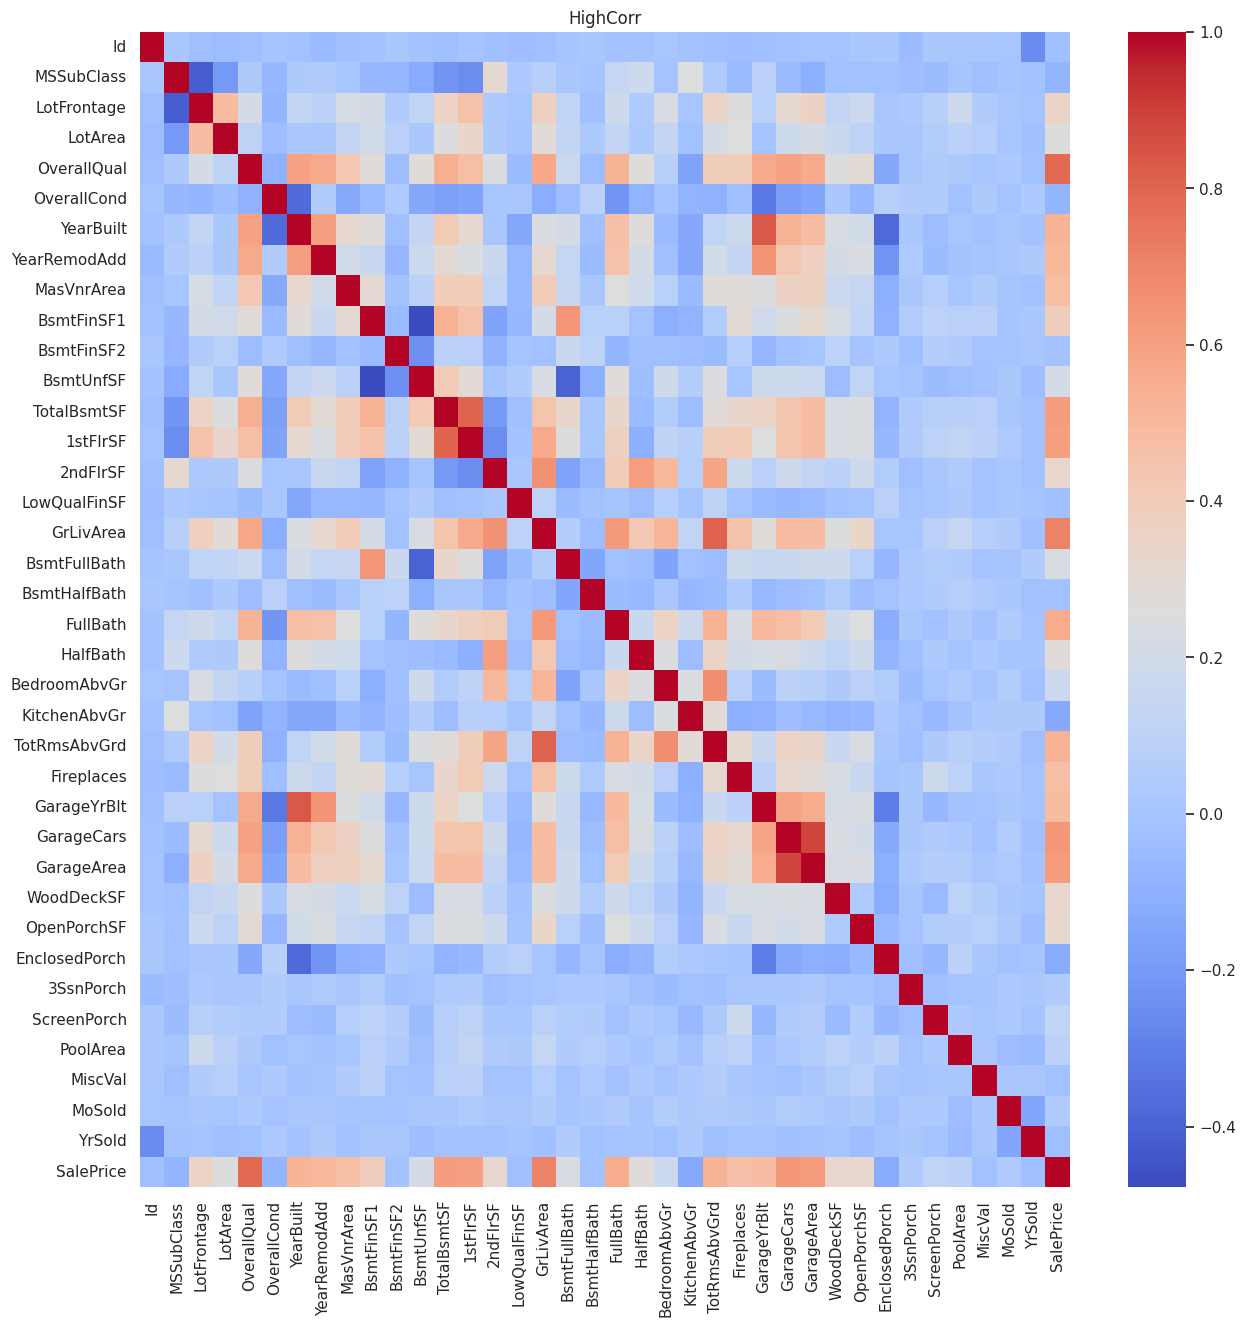

In [ ]:
# Veri Seti İçinde Yüksek Korelasyon Gösteren Değişkenleri Saptayalım;

def high_corr_analysis(dataframe,corr_perch = .80,plot = False):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]) >= corr_perch]

  if plot:
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(rc = {"figure.figsize" : (15,15)})
    sns.heatmap(corr,cmap = "coolwarm")
    plt.title("HighCorr")
    plt.show()

  return drop_list

high_corr_list = high_corr_analysis(df,plot = True)

### Görev 2: Feature Engineering

In [ ]:
# yüksek korelasyon tespit ettiğimiz değişkenleri inceleyelim;

df[high_corr_list].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.000,8450,7,5,2003,2003,196.000,706.000,0.000,150.000,856.000,856,854,0,1710,1.000,0.000,2,1,3,1,8,0,2003.000,2.000,548.000,0,61,0,0,0,0,0,2,2008,208500.000
1,2,20,80.000,9600,6,8,1976,1976,0.000,978.000,0.000,284.000,1262.000,1262,0,0,1262,0.000,1.000,2,0,3,1,6,1,1976.000,2.000,460.000,298,0,0,0,0,0,0,5,2007,181500.000
2,3,60,68.000,11250,7,5,2001,2002,162.000,486.000,0.000,434.000,920.000,920,866,0,1786,1.000,0.000,2,1,3,1,6,1,2001.000,2.000,608.000,0,42,0,0,0,0,0,9,2008,223500.000
3,4,70,60.000,9550,7,5,1915,1970,0.000,216.000,0.000,540.000,756.000,961,756,0,1717,1.000,0.000,1,0,3,1,7,1,1998.000,3.000,642.000,0,35,272,0,0,0,0,2,2006,140000.000
4,5,60,84.000,14260,8,5,2000,2000,350.000,655.000,0.000,490.000,1145.000,1145,1053,0,2198,1.000,0.000,2,1,4,1,9,1,2000.000,3.000,836.000,192,84,0,0,0,0,0,12,2008,250000.000


In [ ]:
# aykırı değerler için inceleme yapalım;

def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))

Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False


In [ ]:
# Aykırı değerleri baskılama yoluyla düzeltelim;
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

# Tekrar bir inceleme yapalım;
for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))

Id False
MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
MoSold False


In [ ]:
# Veri setindeki eksik gözlemler için inceleme yapalım;

def missing_table(df):
  # eksik gözlem içeren değişkenleri seçelim;
  na_cols = [col for col in df.columns if df[col].isnull().sum()> 0]

  # gözlem sayısını elde edelim;
  n_miss = df[na_cols].isnull().sum().sort_values(ascending=False)

  # eksik verininin değişken içindeki sayısını belirleyelim;
  ratio = ((df[na_cols].isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

  # birleştirelim;
  miss_df = pd.concat([n_miss,np.round(ratio,2)], axis = 1, keys = ["miss_count", "ratio"])

  print("TOPLAM GÖZLEM SAYISI: ", df.shape[0])
  print()
  print(miss_df)

missing_table(df)


TOPLAM GÖZLEM SAYISI:  2919

              miss_count  ratio
PoolQC              2909 99.660
MiscFeature         2814 96.400
Alley               2721 93.220
Fence               2348 80.440
SalePrice           1459 49.980
FireplaceQu         1420 48.650
LotFrontage          486 16.650
GarageCond           159  5.450
GarageYrBlt          159  5.450
GarageFinish         159  5.450
GarageQual           159  5.450
GarageType           157  5.380
BsmtExposure          82  2.810
BsmtCond              82  2.810
BsmtQual              81  2.770
BsmtFinType2          80  2.740
BsmtFinType1          79  2.710
MasVnrType            24  0.820
MasVnrArea            23  0.790
MSZoning               4  0.140
Functional             2  0.070
BsmtHalfBath           2  0.070
BsmtFullBath           2  0.070
Utilities              2  0.070
KitchenQual            1  0.030
TotalBsmtSF            1  0.030
BsmtUnfSF              1  0.030
GarageCars             1  0.030
GarageArea             1  0.030
BsmtFinSF2 

In [ ]:
# Veri setindeki eksik gözlemlerin hedef değişken arasındaki ilişkiyi gözlemleyelim;

def missing_vs_target(df,target,cat_cols):
  temp_df = df.copy()
  na_cols = [col for col in cat_cols if df[col].isnull().sum()]

  for col in na_cols:
    temp_df["_NA_" + col] = np.where(df[col].isnull(),1,df[col])

  flag_col = temp_df.loc [:,temp_df.columns.str.contains("_NA_")].columns

  for col in flag_col:
    print(col)
    print(pd.DataFrame({"COUNT" : temp_df.groupby(col)[target].count(),
                        "MEAN"  : temp_df.groupby(col)[target].mean()}),end = "\n\n")
    print("#"*30)


missing_vs_target(df,"SalePrice",cat_cols)

_NA_MSZoning
              COUNT       MEAN
_NA_MSZoning                  
1                 0        NaN
C (all)          10  74528.000
FV               65 214014.062
RH               16 131558.375
RL             1151 191004.995
RM              218 126316.830

##############################
_NA_Alley
           COUNT       MEAN
_NA_Alley                  
1           1369 183452.131
Grvl          50 122219.080
Pave          41 168000.585

##############################
_NA_Utilities
               COUNT       MEAN
_NA_Utilities                  
1                  0        NaN
AllPub          1459 180950.957
NoSeWa             1 137500.000

##############################
_NA_Exterior1st
                 COUNT       MEAN
_NA_Exterior1st                  
1                    0        NaN
AsbShng             20 107385.550
AsphShn              1 100000.000
BrkComm              2  71000.000
BrkFace             50 194573.000
CBlock               1 105000.000
CemntBd             61 231690.6

In [ ]:
# Eksik gözlemleri hızlıca manipüle etmek için fonksyion hazırlayalım;

def quick_missing_imp(df,target,num_method = "mean",cat_perch = 17):
  temp_df = df.copy()

  na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

  print("# BEFORE") # uygulama yapılmadan önce veri setindeki eksik gözlemler.
  print(df[na_cols].isnull().sum(), "\n\n")

  # cat_cols
  df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O") and (len(x.unique()) <= cat_perch) else x, axis = 0)

  if num_method == "mean":
    df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis = 0)
  elif num_method == "median":
    df = df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis = 0)

  df[target] = temp_df[target]

  print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
  print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
  print(df[na_cols].isnull().sum(), "\n\n")

  return df


df = quick_missing_imp(df,"SalePrice")


# BEFORE
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Alley              0
Utilities          0
Exterior1st        0
Exterior2nd     

In [ ]:
# Değişkenler içindeki nadir gözlemleri inceleyelim;

def rare_encoding(df,cat_cols,rare_perch = 0.01):
  temp_df = df.copy()
  rare_cols = [col for col in cat_cols if (temp_df[col].value_counts(normalize=True)<=rare_perch).any(axis = None)]

  for col in rare_cols:
    tmp = temp_df[col].value_counts(normalize=True)
    indices = tmp[tmp<=rare_perch].index
    temp_df[col] = np.where(temp_df[col].isin(indices), "Rare",temp_df[col])

  return temp_df

dff = rare_encoding(df,cat_cols)
for col in cat_cols:
  print(dff[col].value_counts(normalize=True))

RL     0.777
RM     0.158
FV     0.048
Rare   0.017
Name: MSZoning, dtype: float64
Pave   0.996
Rare   0.004
Name: Street, dtype: float64
Grvl   0.973
Pave   0.027
Name: Alley, dtype: float64
Reg    0.637
IR1    0.332
IR2    0.026
Rare   0.005
Name: LotShape, dtype: float64
Lvl   0.898
HLS   0.041
Bnk   0.040
Low   0.021
Name: LandContour, dtype: float64
AllPub   1.000
Rare     0.000
Name: Utilities, dtype: float64
Inside    0.731
Corner    0.175
CulDSac   0.060
FR2       0.029
Rare      0.005
Name: LotConfig, dtype: float64
Gtl    0.952
Mod    0.043
Rare   0.005
Name: LandSlope, dtype: float64
Norm     0.860
Feedr    0.056
Artery   0.032
Rare     0.022
RRAn     0.017
PosN     0.013
Name: Condition1, dtype: float64
Norm   0.990
Rare   0.010
Name: Condition2, dtype: float64
1Fam     0.831
TwnhsE   0.078
Duplex   0.037
Twnhs    0.033
2fmCon   0.021
Name: BldgType, dtype: float64
1Story   0.504
2Story   0.299
1.5Fin   0.108
SLvl     0.044
SFoyer   0.028
Rare     0.017
Name: HouseStyle, dt

Bağımlı Değişken


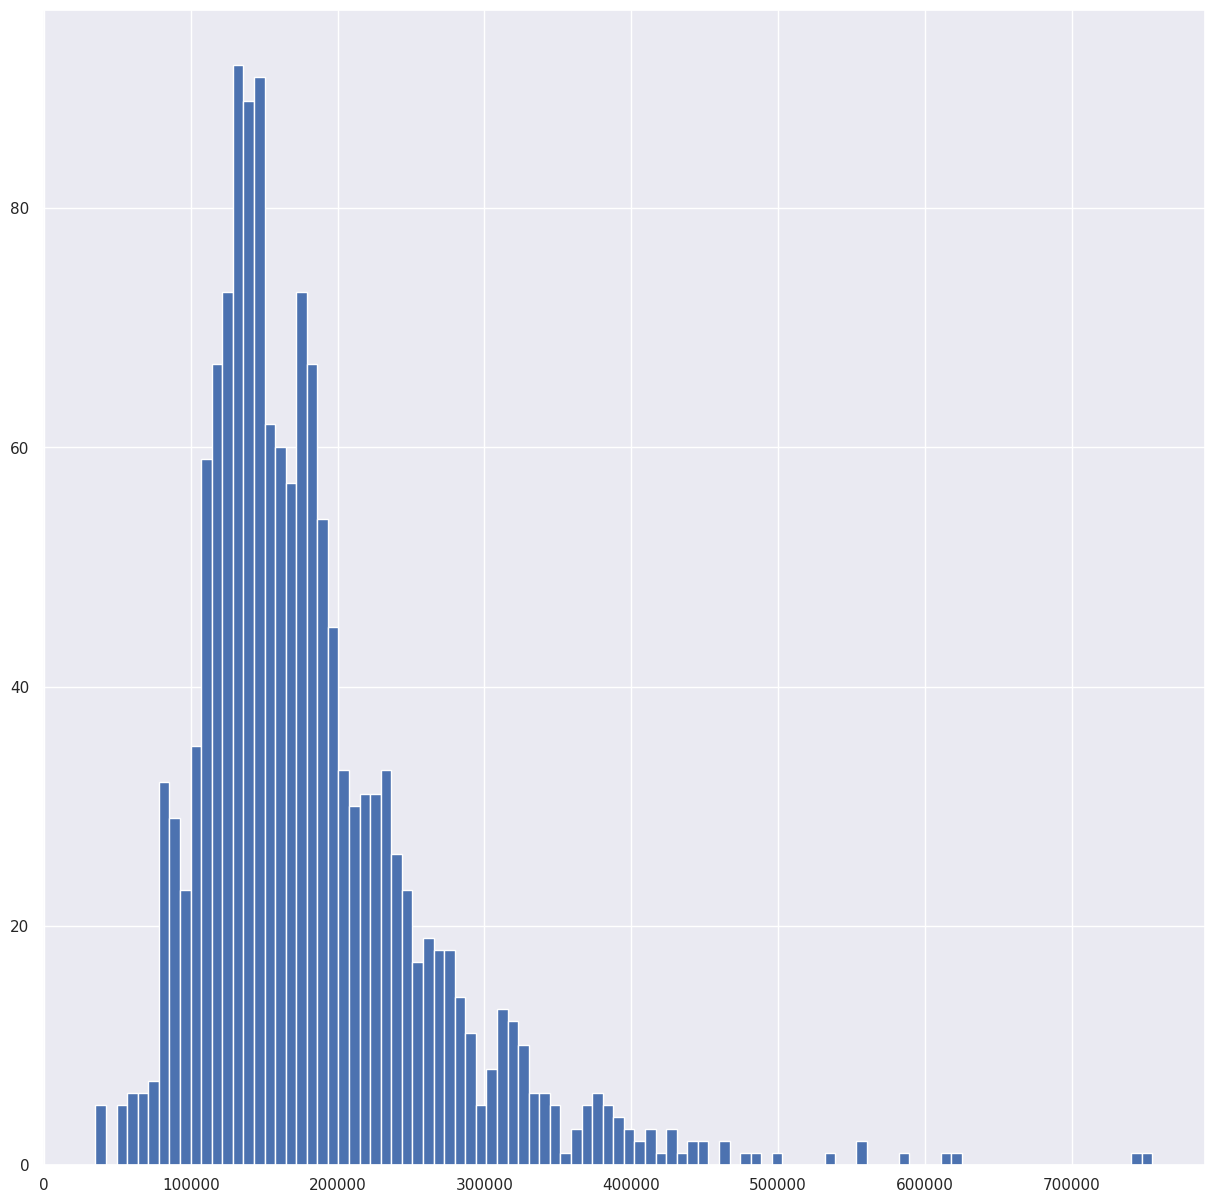

####################################################################################################
Log Dönüşümü Yapılan Bağımlı Değişken Dağılımı


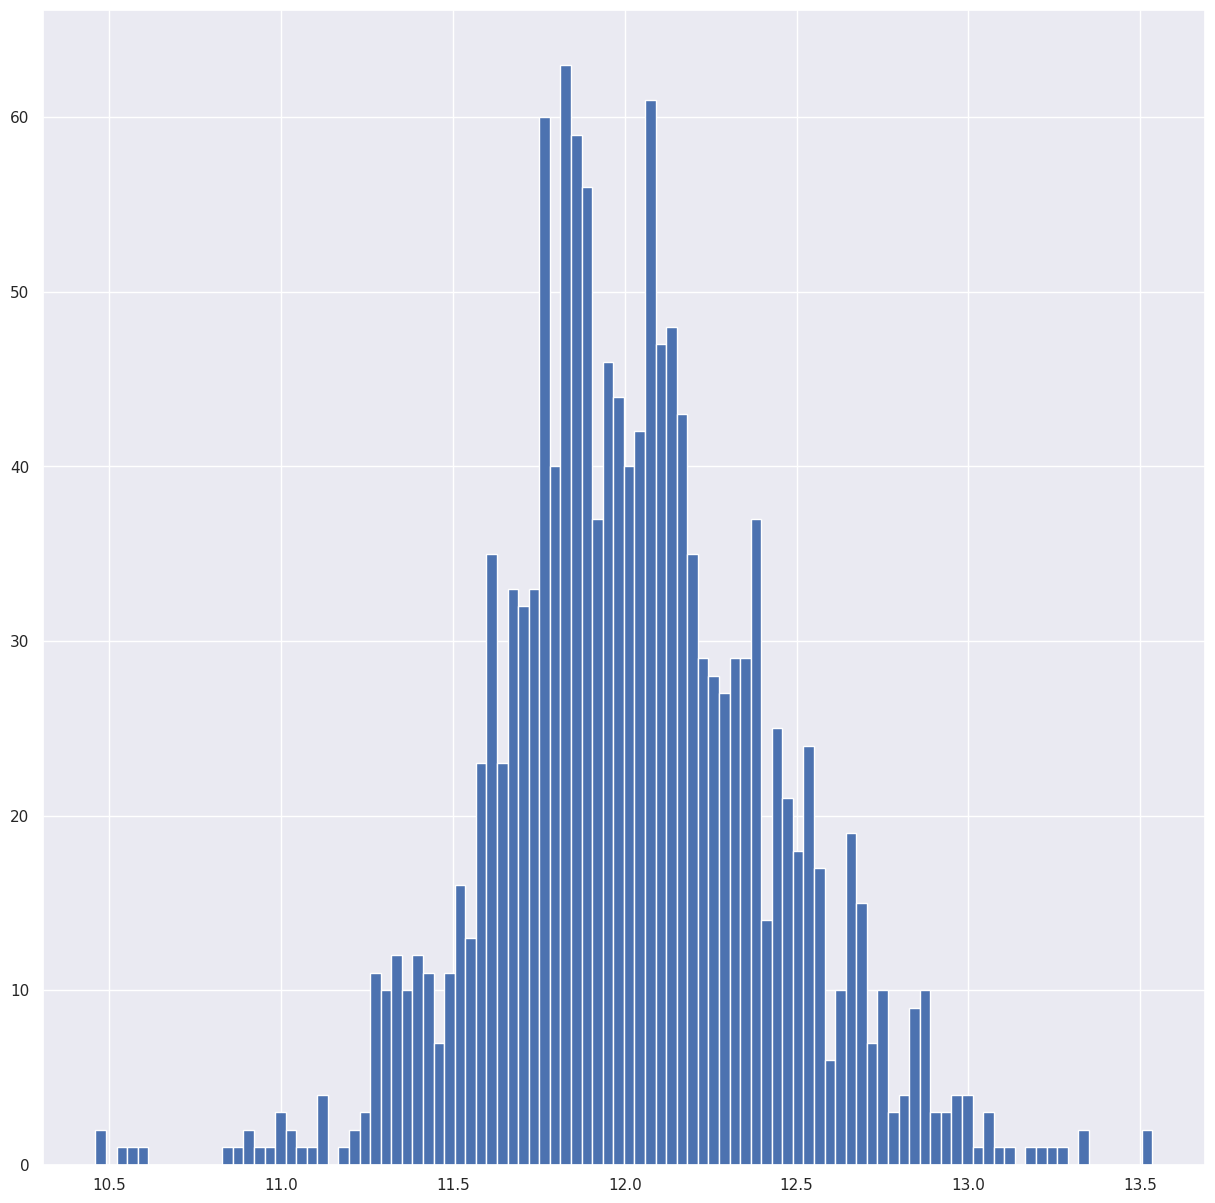

In [ ]:
# Bağımlı değişken üzerinde logaritmik inceleme yapalım;

print("Bağımlı Değişken")
df["SalePrice"].hist(bins=100)
plt.show()
print("#"*100)
print("Log Dönüşümü Yapılan Bağımlı Değişken Dağılımı")
np.log1p(df["SalePrice"]).hist(bins=100)
plt.show()

In [ ]:
# Yeni Değişken Oluşturma İşlemi Yapalım;

df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1) # 42


# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"] # 32

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2 # 56

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF # 93

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF # 156

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF # 35


# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea # 64

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea # 57

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea # 69

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea # 36

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF) # 73


df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"] # 61


df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt # 31

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt # 73

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd # 40

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt # 17

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd) # 30

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt # 48



drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]


df.drop(drop_list,axis=1,inplace=True)

cat_cols,car_cols,num_cols = grab_col_names(df)

Observations: 2919
Variables: 92
cat_cols: 49
num_cols: 43
cat_but_car: 0
num_but_cat: 15


In [ ]:
# Encoding İşlemlerini Yapalım;

def ohe_encoding(dataframe, categorical_cols, drop_first = False):
  return pd.get_dummies(dataframe, columns = categorical_cols, drop_first = drop_first)

df = ohe_encoding(df,cat_cols, drop_first = True)

df.shape

(2919, 255)

### Görev 3 : Model Kurma

In [ ]:
# train ve test veri setlerini ayırt edelim;
train_df = df[df["SalePrice"].notnull()]
test_df  = df[df["SalePrice"].isnull()]

# Değişenleri Ayırt Edelim;
X= train_df.drop(["Id","SalePrice"], axis = 1)
y= train_df["SalePrice"]

# Modeli Kuralım;
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = 40)

models = [('LR', LinearRegression()),
          #("Ridge", Ridge()),
          #("Lasso", Lasso()),
          #("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]


# Modellerin RMSE değerini hesaplayıp en uygun modeli seçmeye çalışalım;

for name,reg in models:
  score = np.mean(np.sqrt(-cross_val_score(reg,X,y,
                                   cv = 5 ,
                                   scoring = "neg_mean_squared_error")))

  print(f"RMSE - {name}\t :\t ", np.round(score,4))


RMSE - LR	 :	  42531.8755
RMSE - KNN	 :	  47557.3947
RMSE - CART	 :	  37534.8292
RMSE - RF	 :	  29297.8257
RMSE - GBM	 :	  25610.0101
RMSE - XGBoost	 :	  28531.743
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6478
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 168
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6489

In [ ]:
# Log Dönüşümü Yaparak Model Kurup RMSE değerini hesaplayalım;

X = train_df.drop(["Id","SalePrice"], axis = 1)
y = np.log1p(train_df["SalePrice"])

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size = .20)

lgbm = LGBMRegressor().fit(X_train,y_train)
y_pred = lgbm.predict(X_test)


# log dönüşüm işlemini geri alalım;
new_y = np.expm1(y_pred)
new_y_test = np.expm1(y_test)

print("RMSE - LightGBM	 :",np.sqrt( mean_squared_error(new_y_test,new_y)))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6483
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 167
[LightGBM] [Info] Start training from score 12.024355
RMSE - LightGBM	 : 24080.407290349893


In [ ]:
# LGBM modeli için hiper parametre optimizasyonu yapalım;

# Değişenleri Ayırt Edelim;
X= train_df.drop(["Id","SalePrice"], axis = 1)
y= train_df["SalePrice"]

lgbm_model = LGBMRegressor(random_state=40)

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model,X,y,cv=5, scoring="neg_mean_squared_error")))

# parametre aralıklarını girelim;
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
               #"colsample_bytree": [0.5, 0.7, 1]
               }

# optimum parametreyi hesaplayalım;

lgbm_gs_best = GridSearchCV(lgbm_model,lgbm_params,cv = 3,n_jobs = -1,verbose = True).fit(X_train,y_train)

final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X,y)


new_y = np.expm1(y)
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

print("RMSE -", rmse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6478
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 168
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6489
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 163
[LightGBM] [Info] Start training from score 180407.575342
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6478
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 168
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6489
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 163
[LightGBM] [Info] Start training from score 180407.575342
[LightGBM] [

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6820
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 172
[LightGBM] [Info] Start training from score 180921.195890


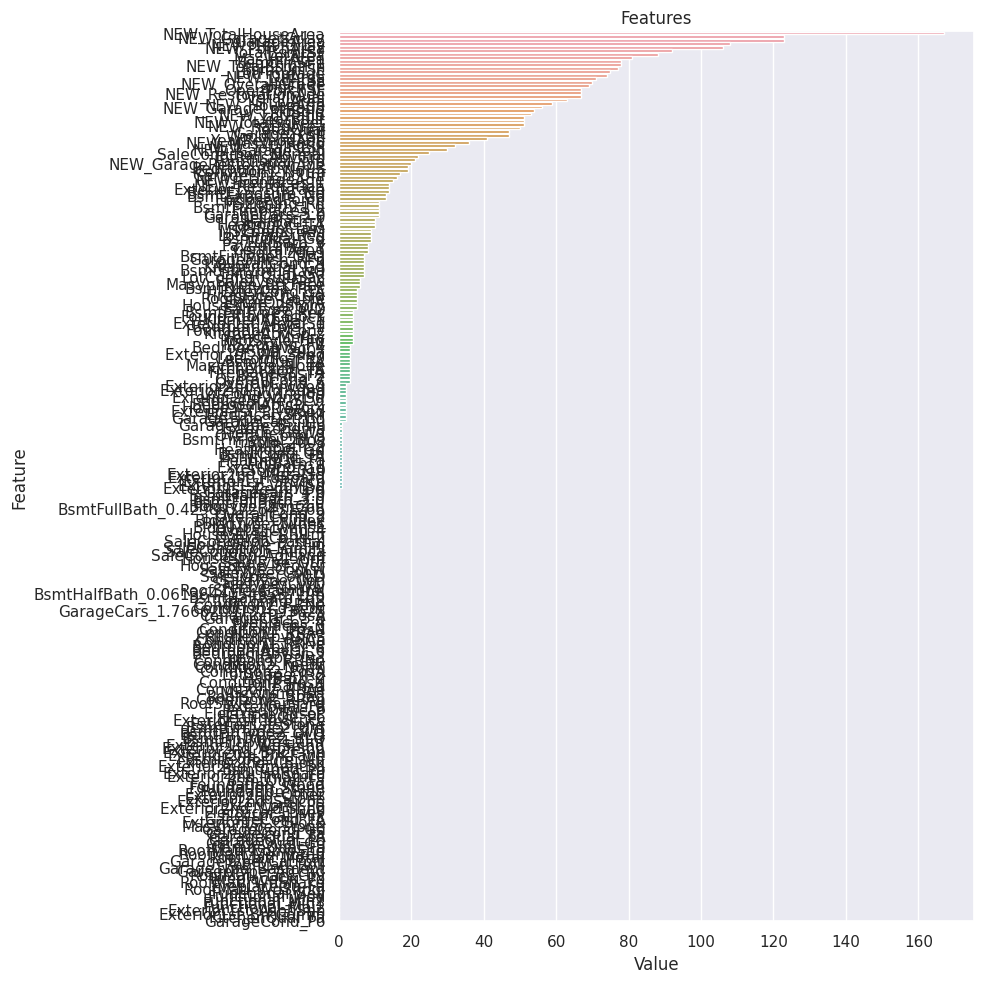

In [ ]:
# Değişkenlerin Önem Düzeyini İnceleyelim;

def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

model = LGBMRegressor()
model.fit(X, y)

plot_importance(model, X)



In [ ]:
# Kaggle sayfasına submit etmeye uygun halde bir dataframe oluşturalım. (Id, SalePrice)

model = LGBMRegressor()
model.fit(X, y)
predictions = model.predict(test_df.drop(["Id","SalePrice"], axis=1))

dictionary = {"Id":test_df.index, "SalePrice":predictions}
dfSubmission = pd.DataFrame(dictionary)
dfSubmission.to_csv("housePricePredictions.csv", index=False)


